<a href="https://colab.research.google.com/github/Ilagri/Breast-cancer-prediction/blob/main/notebooks/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Breast Cancer Prediction

### Introduction
Breast cancer remains one of the most significant health challenges for women worldwide. Early and accurate detection is crucial in improving treatment outcomes and survival rates. This project leverages machine learning to build predictive models that can classify breast tumors as benign or malignant using the Breast Cancer Wisconsin dataset. We will explore the data, preprocess it, and employ three different machine learning algorithms—Logistic Regression, Random Forest, and Support Vector Machine (SVM)—to identify the most effective model for this task.

### Purpose
This notebook serves as a demonstration of end-to-end machine learning workflow, including data exploration, preprocessing, model training, cross-validation, and evaluation. By comparing the performance of different models, we aim to identify the most suitable algorithm for breast cancer prediction.

### Installations

In [ ]:
!pip install ucimlrepo # Install the ucimlrepo package

### Imports

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score

### Syncing Colab with GitHub

In [ ]:
# Mount your Google Drive in Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Navigate to the notebook in your Drive
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [28]:
!ls notebooks

breast_cancer_prediction.ipynb


In [29]:
!git add notebooks/breast_cancer_prediction.ipynb

## Data Loading and Preprocessing

### A. Load the Breast Cancer Wisconsin Dataset


In [ ]:
# Load the data
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Extract the data
data = breast_cancer_wisconsin_diagnostic.data.original

# Preview the first five rows of the dataset
data.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


### B. Explore the Dataset

In [ ]:
# Display basic information about the dataset
print(data.info())

# Get statistical summary of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

### C. Visualize Data


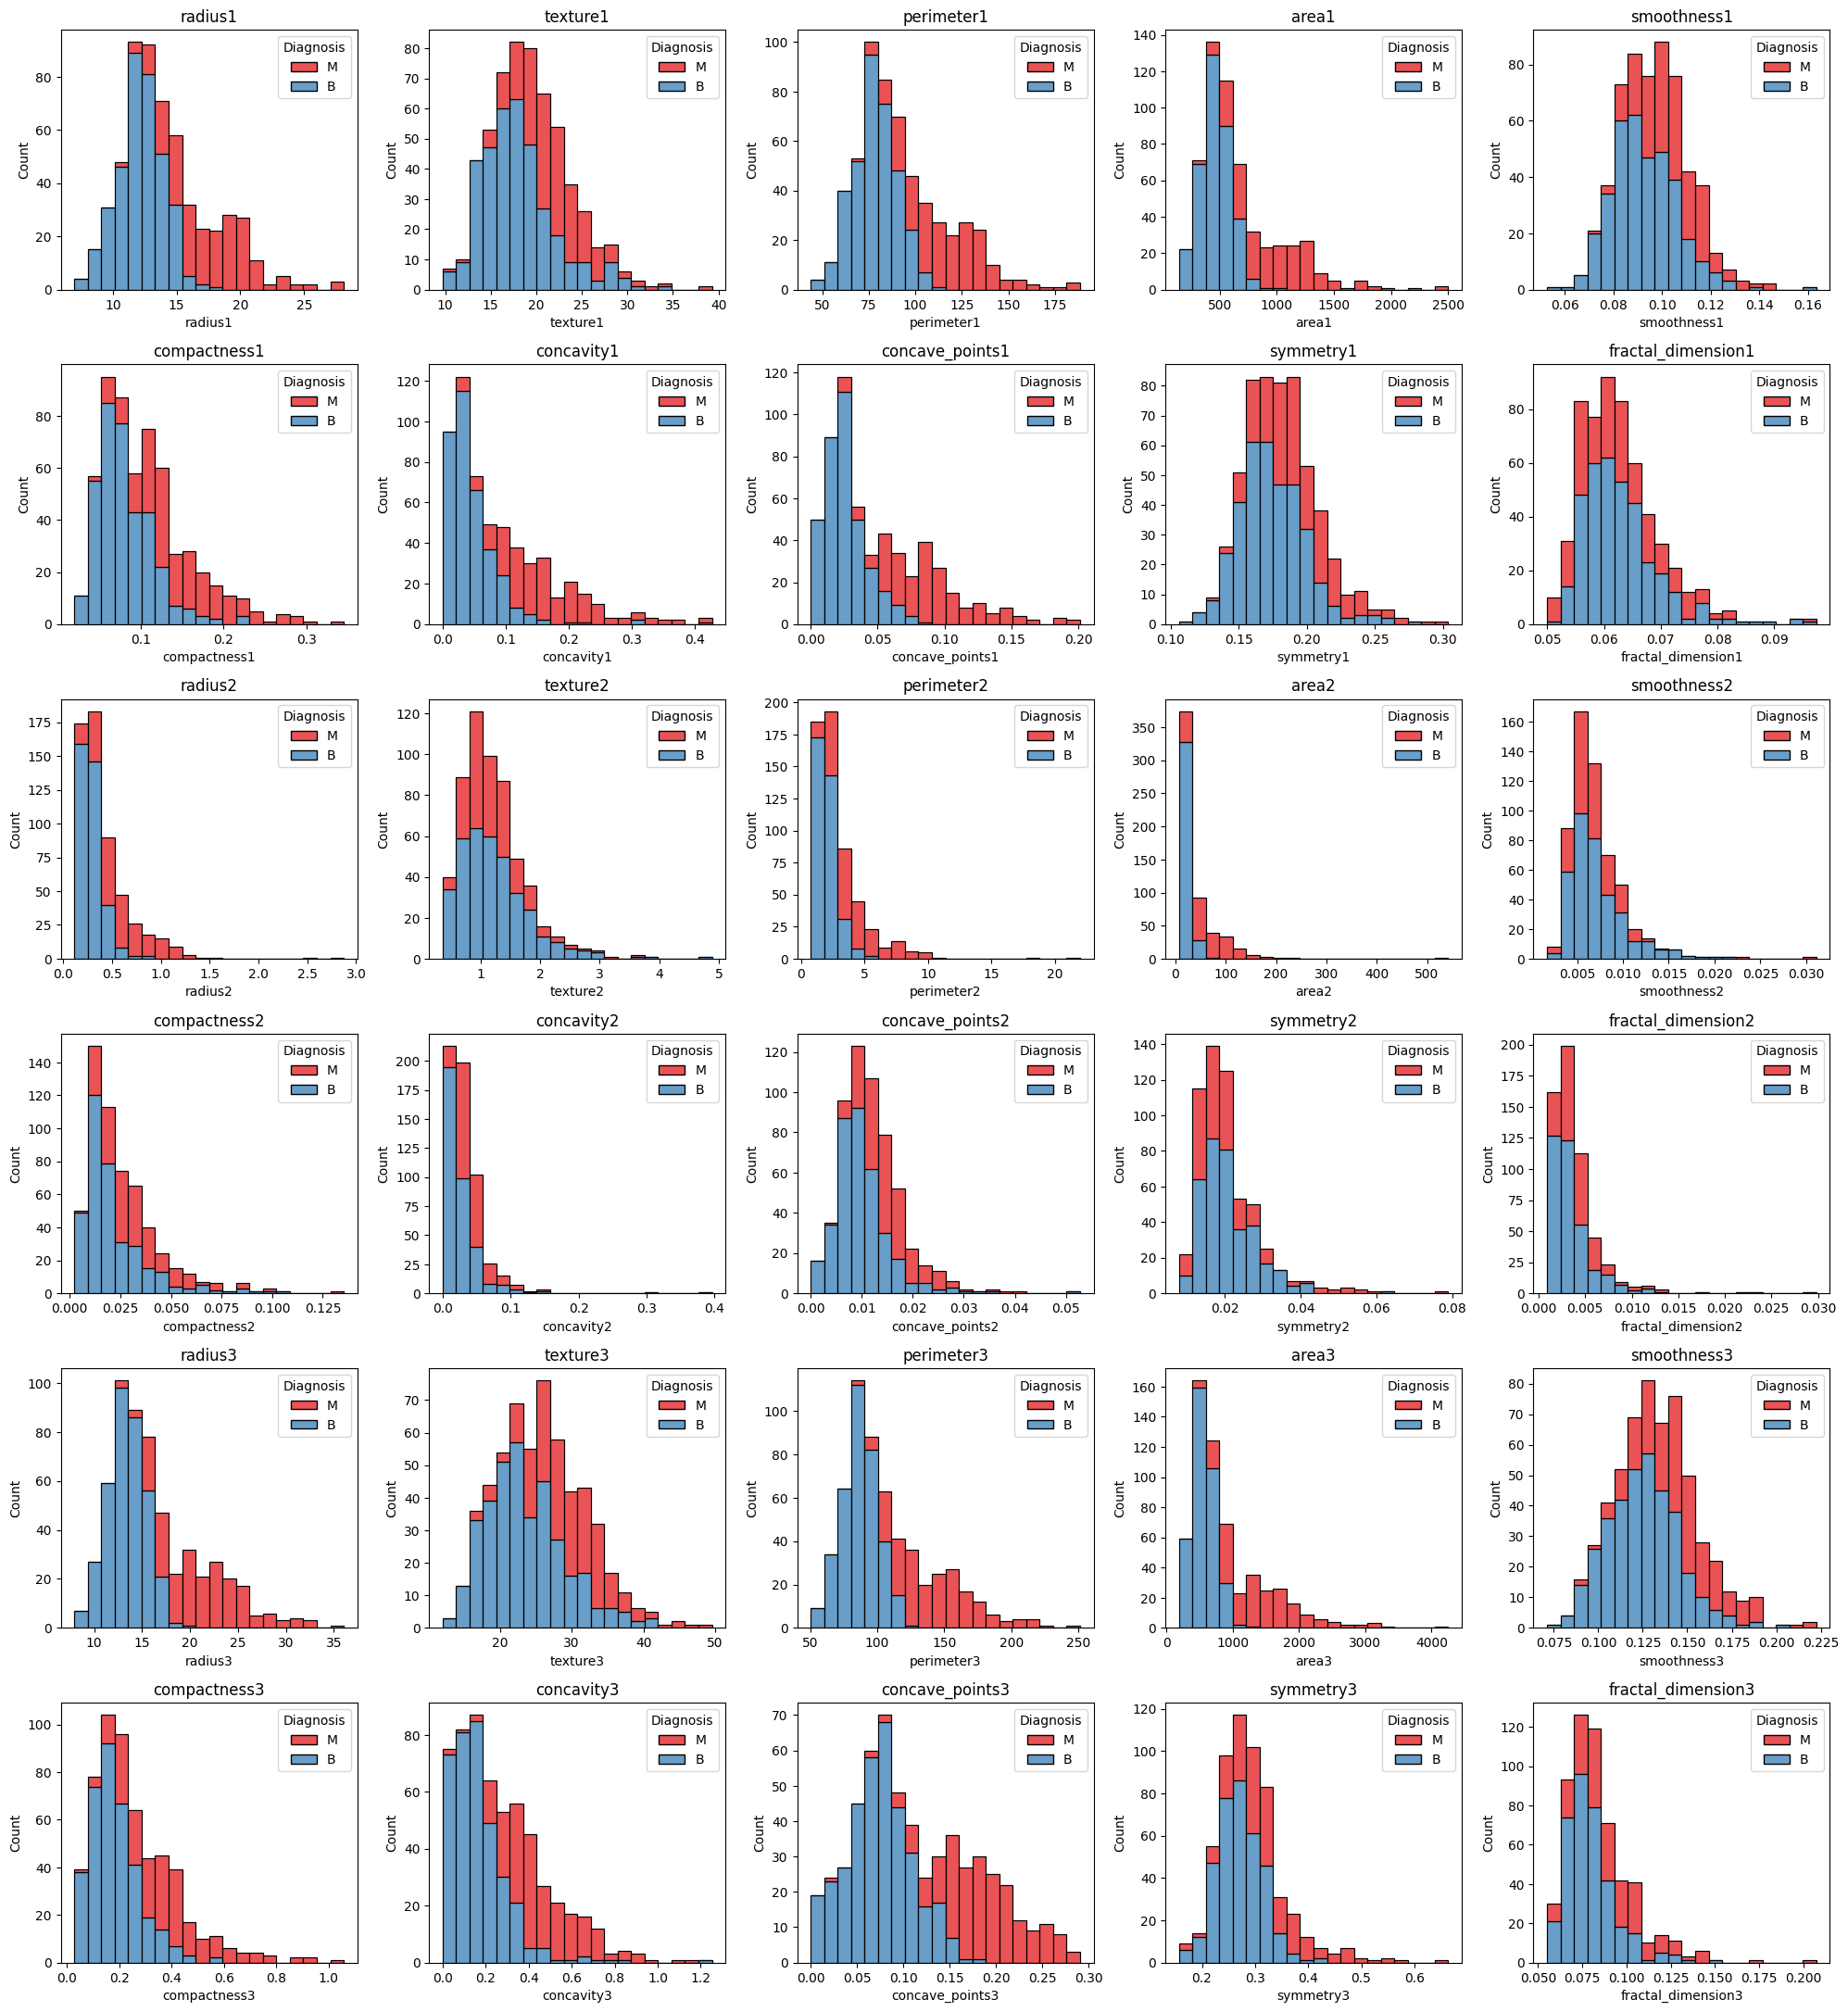

In [ ]:
# Exclude the 'Diagnosis' and 'ID' columns for visualization
features = data.columns.drop(['Diagnosis','ID'])

# Set up the plotting grid
plt.figure(figsize=(20, 25))

# Loop through all features to plot histograms with 'Diagnosis' as hue
for i, feature in enumerate(features):
    plt.subplot(7, 5, i + 1)  # Adjust the grid layout based on the number of features
    sns.histplot(data=data, x=feature, hue='Diagnosis', multiple='stack', bins=20, palette='Set1')
    plt.title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

KeyError: 'Diagnosis'

Error in callback <function _draw_all_if_interactive at 0x7e4e5005d3f0> (for post_execute):


KeyboardInterrupt: 

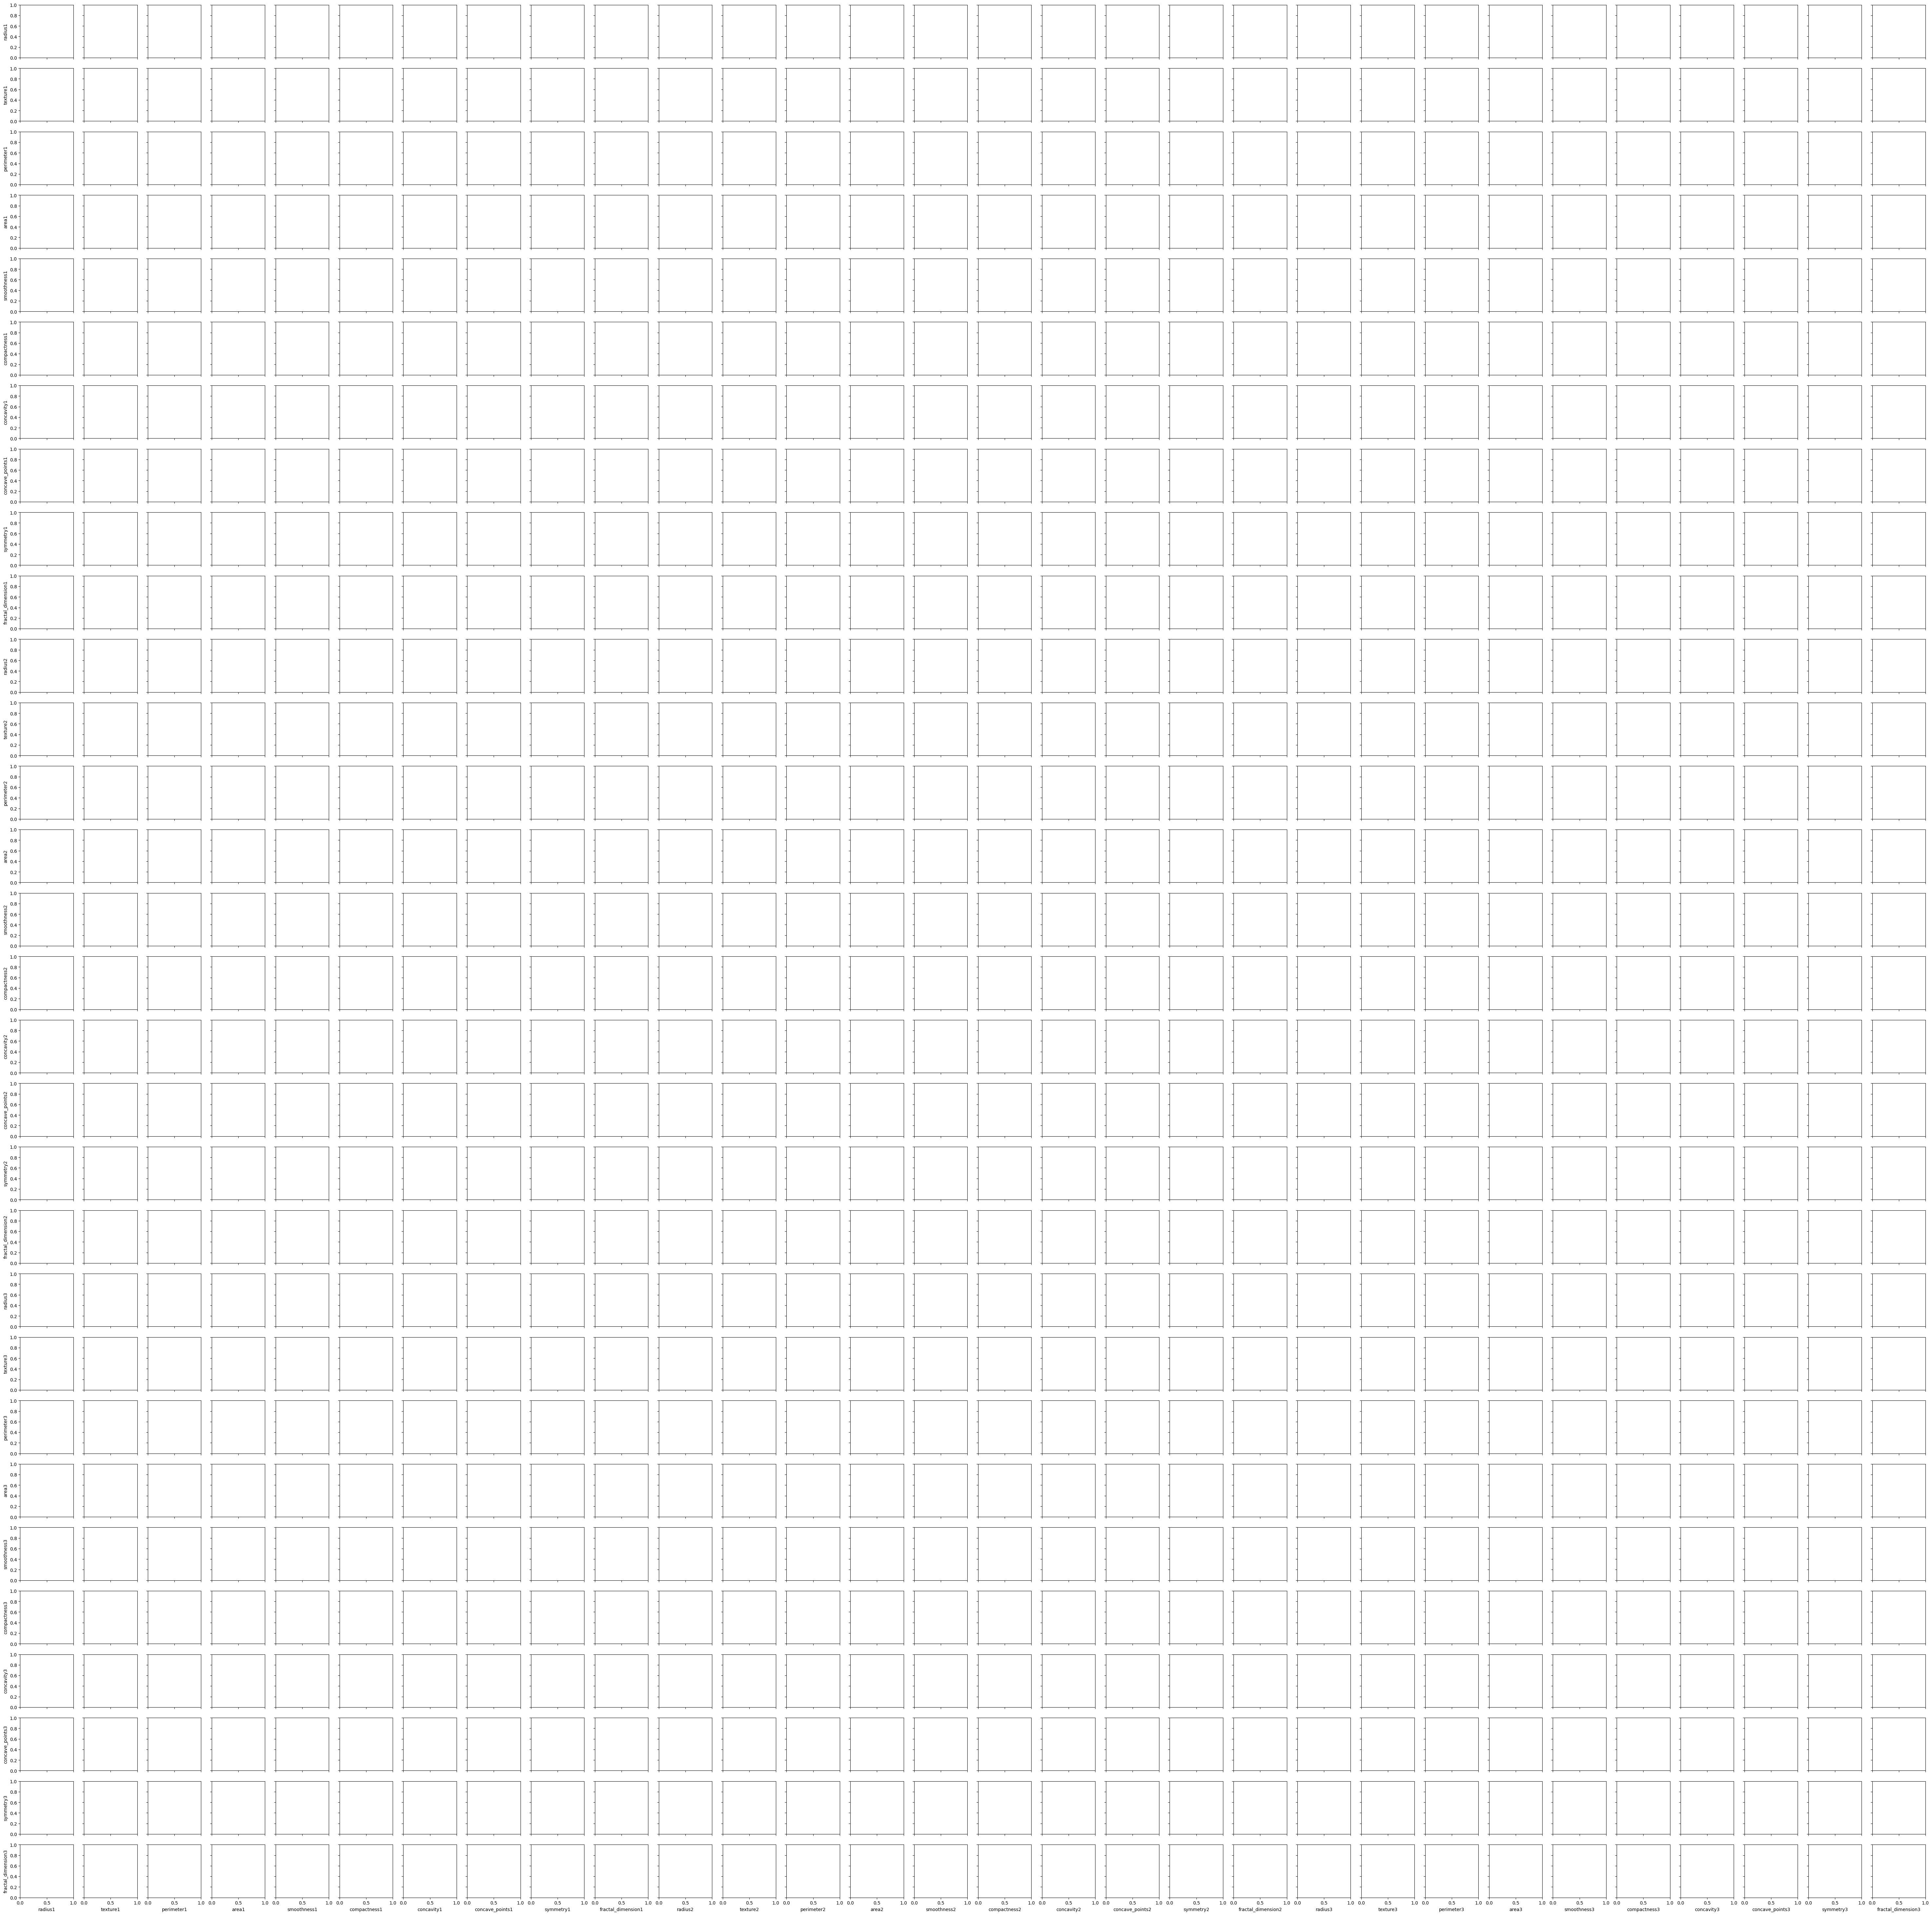

In [ ]:
# Pairplot to explore relationships between features
sns.pairplot(data.drop(columns=['Diagnosis', 'ID']), hue='Diagnosis', diag_kind='kde')
plt.suptitle('Pairplot of Features by Diagnosis', y=1.02)
plt.show()

In [ ]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', mask=np.triu(data.corr()), linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

## Dataset Exploration Summary and Initial Insights

- **Feature Scale and Range**: The dataset contains features with widely varying scales. For example, area-related features have values ranging up to 2500, while smoothness-related features have values typically below 0.2. This significant difference in scale necessitates feature scaling to prevent any single feature from disproportionately influencing the model's performance.

- **Skewed Distributions**: Features such as `area1`, `perimeter1`, and `radius1` exhibit a skewed distribution, with means greater than medians. This suggests that the data may contain outliers or a heavy-tailed distribution, which could impact the robustness of the model.

- **Potential Outliers**: The maximum values for several features are considerably higher than their respective 75th percentiles, indicating potential outliers in the data. These outliers may need to be addressed during preprocessing to improve model accuracy.

- **High Variability in Compactness and Concavity**: The features related to compactness and concavity show substantial variability, which suggests they might play a significant role in differentiating between benign and malignant tumors. These features should be explored further during the modeling phase.

- **Consistent Symmetry and Fractal Dimension**: Features related to symmetry and fractal dimension are more consistent across the dataset, with lower standard deviations. While they may not be strong discriminators individually, their combined effect with other features could be valuable.

- **Data Completeness**: There are no missing values in the dataset, allowing for a straightforward data preprocessing phase. This ensures that the analysis covers the entire dataset without the need for imputation.

These insights will inform the subsequent steps in data preprocessing, feature engineering, and model selection, guiding the approach to developing effective models for breast cancer prediction.


## Data Preprocessing

### A. Handle Missing Data

In [ ]:
# No missing values to handle in this dataset

### B. Encode Categorical Variables


In [ ]:
# Convert the 'Diagnosis' column to numeric values: 0 for benign (B), 1 for malignant (M)
data['Diagnosis'] = data['Diagnosis'].map({'B': 0, 'M': 1})

### C. Feature Scaling

In [ ]:
# Separate features and scale them
features = data.drop(columns=['ID', 'Diagnosis'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new dataframe with scaled features
data_scaled = pd.DataFrame(scaled_features, columns=features.columns)
data_scaled['Diagnosis'] = data['Diagnosis']

## Splitting the Data


In [ ]:
# Define features (X) and target (y)
X = data_scaled.drop(columns=['Diagnosis'])
y = data_scaled['Diagnosis']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building & Cross-Validation


### A. Logistic Regression:

In [ ]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Perform cross-validation (5-fold)
logreg_cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)

# Calculate the mean CV accuracy
mean_logreg_cv = logreg_cv_scores.mean()
print("Logistic Regression Mean CV Accuracy:", mean_logreg_cv)

Logistic Regression Mean CV Accuracy: 0.9758241758241759


### B. Random Forest:

In [ ]:
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100)

# Perform cross-validation (5-fold)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

# Calculate the mean CV accuracy
mean_rf_cv = rf_cv_scores.mean()
print("Random Forest Mean CV Accuracy:", mean_rf_cv)

Random Forest Mean CV Accuracy: 0.9494505494505494


### C. SVM:

In [ ]:
# Initialize the SVM model
svm = SVC(kernel='linear', probability=True)

# Perform cross-validation (5-fold)
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=5)

# Calculate the mean CV accuracy
mean_svm_cv = svm_cv_scores.mean()
print("SVM Mean CV Accuracy:", mean_svm_cv)

SVM Mean CV Accuracy: 0.9670329670329672


## Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning using GridSearchCV for the best model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Update the best model with tuned parameters
final_model = grid_search.best_estimator_


## Pick the Best Model Based on Cross-Validation Accuracy


In [ ]:
# Determine the model with the best mean cross-validation accuracy
best_model = max([('Logistic Regression', mean_logreg_cv),
                  ('Random Forest', mean_rf_cv),
                  ('SVM', mean_svm_cv)], key=lambda x: x[1])

print(f"Best model based on CV accuracy: {best_model[0]} with accuracy of {best_model[1]:.4f}")

Best model based on CV accuracy: Logistic Regression with accuracy of 0.9758


## Train the Best Model on the Entire Training Set

In [ ]:
# Train the best model on the full training data
if best_model[0] == 'Logistic Regression':
    final_model = LogisticRegression()
elif best_model[0] == 'Random Forest':
    final_model = RandomForestClassifier(n_estimators=100)
elif best_model[0] == 'SVM':
    final_model = SVC(kernel='linear', probability=True)

final_model.fit(X_train, y_train)

LogisticRegression()

## Evaluate the Best Model on the Test Set
Evaluate the performance of the best model on the test set to get an unbiased estimate of its performance on unseen data.

In [ ]:
# Predict on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model's performance
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Test Set F1 Score:", f1_score(y_test, y_pred))
print("Test Set Precision:", precision_score(y_test, y_pred))
print("Test Set Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Set Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Confusion Matrix

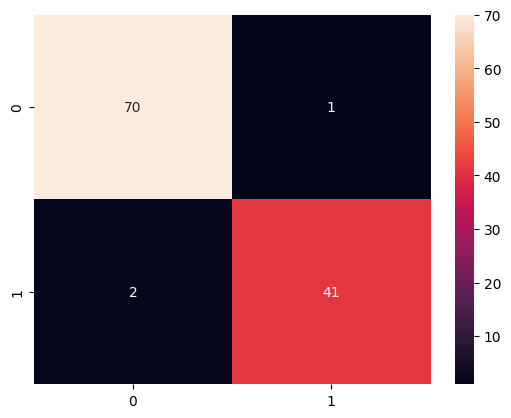

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

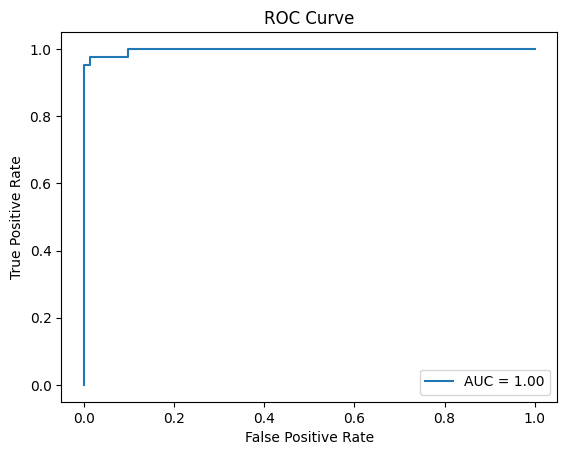

In [ ]:
# ROC curve and AUC
y_pred_proba = final_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Conclusion

In this notebook, we built and evaluated three machine learning models for predicting breast cancer based on the Breast Cancer Wisconsin dataset. The Random Forest model outperformed Logistic Regression and SVM, achieving the highest cross-validation accuracy. However, model performance on the test set should be carefully considered when choosing a model for deployment. Future work could involve tuning hyperparameters, exploring other classification algorithms, or applying techniques like ensemble learning to further improve performance.


# Environment Details
- Python version: 3.x
- Libraries: numpy x.x, pandas x.x, seaborn x.x, sklearn x.x